Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Extraer la AUTH_API proveida por la ENACOM

In [3]:
# Deben instalar esta libreria 
from dotenv import load_dotenv
import os

# reemplaza esto con la ruta completa del archivo .env
load_dotenv(dotenv_path=".env")

auth_api = os.environ.get("AUTH_API")

Claro que sí, puedo ayudarte a mejorar la ortografía en tu texto:

La plataforma de ENACOM nos permite observar varios aspectos sobre la realidad de los servicios de internet en Argentina; aspectos que pueden llegar a ser un enfoque de estudio. Entre ellos tenemos:

- Las diferentes tecnologías utilizadas para proveer internet al país.
- Las diferentes velocidades que estas tecnologías proveen.
- Cómo los ingresos trimestrales han ido aumentando de manera casi lineal a lo largo de los años.

Tomando estos 3 aspectos, se ha decidido hacer un análisis exploratorio tomando en cuenta estos 3 objetos de análisis.

Recolectamos la informacion de las diferentes tecnologias utilizadas por provincia y las velecidades que estos sistemas proveen.

In [81]:
import requests

# Informacion de la API pedida en formato ajson
url_internet_provincia = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key={auth_api}"
acc_inter_rangos_veloc = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.ajson/?auth_key={auth_api}"

# Pedimos el get request a las API
response_internet_provincia = requests.get(url_internet_provincia)
response_acc_inter_rangos_veloc = requests.get(acc_inter_rangos_veloc)

# Almacenamos la informacion en una lista para automatizar un poco mas el proceso
data = []
for response in [response_internet_provincia, response_acc_inter_rangos_veloc]:
    if response.status_code == 200:
        data.append(response.json())
    else:
        print("Error en la petición:", response.status_code)



In [82]:
display(data[0])
display(data[1])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'ADSL',
   'Cablemodem',
   'Fibra óptica',
   'Wireless',
   'Otros',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '339,648',
   '2,748,325',
   '1,436,433',
   '126,846',
   '70,416',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '140,791',
   '1,240,125',
   '129,218',
   '5,758',
   '31,787',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '10,010',
   '10,495',
   '46,224',
   '1,329',
   '2,235',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '27,164',
   '61,800',
   '44,645',
   '8,178',
   '2,359',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '45,377',
   '72,212',
   '9,574',
   '29,784',
   '8,831',
   '165,778'],
  ['2022',
   '3',
   'Córdoba',
   '163,770',
   '465,461',
   '338,570',
   '61,070',
   '9,797',
   '1,038,668'],
  ['2022',
   '3',
   'Corrientes',
   '36,508',
   '77,140',
   '18,619',
   '7,256',
   '5,323',
   '144,846'],
  ['2022',
   '3',
   'Entre Ríos',
   '60,3

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'HASTA 512 kbps',
   '+ 512 Kbps - 1 Mbps',
   '+ 1 Mbps - 6 Mbps',
   '+ 6 Mbps - 10 Mbps',
   '+ 10 Mbps - 20 Mbps',
   '+ 20 Mbps - 30 Mbps',
   '+ 30 Mbps',
   'OTROS',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '29,985',
   '27,709',
   '290,315',
   '297,915',
   '267,044',
   '124,190',
   '3,618,689',
   '65,821',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '517',
   '5,742',
   '34,371',
   '67,829',
   '51,946',
   '28,692',
   '1,253,105',
   '105,477',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '71',
   '384',
   '3,107',
   '5,389',
   '5,099',
   '3,737',
   '50,298',
   '2,208',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '461',
   '987',
   '16,782',
   '18,938',
   '8,049',
   '15,828',
   '79,390',
   '3,711',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '109',
   '1,444',
   '45,707',
   '30,940',
   '34,682',
   '15,309',
   '17,563',
   '20,024',
   '165,778'],
 

Como podemos observar al en **category_name**, la informacion esta relacionada con el acceso a internet.
Y la informacion de la tabla esta en **result**.

Pasamos la informacion recibida dataframes de pandas para facilitar su analisis.

In [83]:
df_internet_provincia = pd.DataFrame(data[0]['result'][1:], columns=data[0]['result'][0])
df_veloc_provincia = pd.DataFrame(data[1]['result'][1:], columns=data[1]['result'][0])

Podemos observar que la informacion fue correctamente cargada, pero... Hay algo extranio

In [84]:
df_internet_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           841 non-null    object
 1   Trimestre     841 non-null    object
 2   Provincia     841 non-null    object
 3   ADSL          841 non-null    object
 4   Cablemodem    841 non-null    object
 5   Fibra óptica  841 non-null    object
 6   Wireless      841 non-null    object
 7   Otros         841 non-null    object
 8   Total         841 non-null    object
dtypes: object(9)
memory usage: 59.3+ KB


In [85]:
df_veloc_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    object
 1   Trimestre            840 non-null    object
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    object
 4   + 512 Kbps - 1 Mbps  840 non-null    object
 5   + 1 Mbps - 6 Mbps    840 non-null    object
 6   + 6 Mbps - 10 Mbps   840 non-null    object
 7   + 10 Mbps - 20 Mbps  840 non-null    object
 8   + 20 Mbps - 30 Mbps  840 non-null    object
 9   + 30 Mbps            840 non-null    object
 10  OTROS                840 non-null    object
 11  Total                840 non-null    object
dtypes: object(12)
memory usage: 78.9+ KB


Valores que deberian ser numericos, aparecen como tipo object.

In [86]:
display(df_internet_provincia.head())
display(df_veloc_provincia.head())

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,"339,648","2,748,325","1,436,433","126,846","70,416","4,721,668"
1,2022,3,Capital Federal,"140,791","1,240,125","129,218","5,758","31,787","1,547,679"
2,2022,3,Catamarca,"10,010","10,495","46,224","1,329","2,235","70,293"
3,2022,3,Chaco,"27,164","61,800","44,645","8,178","2,359","144,146"
4,2022,3,Chubut,"45,377","72,212","9,574","29,784","8,831","165,778"


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,"29,985","27,709","290,315","297,915","267,044","124,190","3,618,689","65,821","4,721,668"
1,2022,3,Capital Federal,517,"5,742","34,371","67,829","51,946","28,692","1,253,105","105,477","1,547,679"
2,2022,3,Catamarca,71,384,"3,107","5,389","5,099","3,737","50,298","2,208","70,293"
3,2022,3,Chaco,461,987,"16,782","18,938","8,049","15,828","79,390","3,711","144,146"
4,2022,3,Chubut,109,"1,444","45,707","30,940","34,682","15,309","17,563","20,024","165,778"


Esto es debido a que las registros tienen  el elemento tipo string **(,)**. Hay que removerlo.

Al visualizar los datos de ambos datasets, se encontro un problema en particular en la columna de anio en el dataframe de df_internet_provincia

In [87]:
display(df_internet_provincia['Año'].unique())
display(df_veloc_provincia['Año'].unique())

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

Algunos valores no correspondientes existen, veamoslos mas en especifico

In [88]:
display(df_internet_provincia.loc[df_internet_provincia.values == '*'])
display(df_internet_provincia.loc[df_internet_provincia.values == '2019 *'])

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
840,*,"Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.",,,,,,,


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
288,2019 *,3 *,Buenos Aires,"1,277,249","2,144,956","425,386","85,572","27,070","3,960,233"
289,2019 *,3 *,Capital Federal,"300,288","1,080,973","24,900","3,895","31,155","1,441,211"
290,2019 *,3 *,Catamarca,"24,349","5,543",13,244,"2,251","32,400"
291,2019 *,3 *,Chaco,"50,416","49,156","8,063","5,224","1,592","114,451"
292,2019 *,3 *,Chubut,"37,298","27,090","1,917","15,149","7,551","89,005"
...,...,...,...,...,...,...,...,...,...
355,2019 *,1 *,Santa Cruz,"10,659","4,615",382,"6,514","2,735","24,905"
356,2019 *,1 *,Santa Fe,"340,038","340,344","15,621","23,215","17,860","737,078"
357,2019 *,1 *,Santiago Del Estero,"25,337","61,547",23,"2,847",99,"89,853"
358,2019 *,1 *,Tierra Del Fuego,"19,789","23,549","1,623",0,"1,486","46,447"


Encontramos un registro sin sentido y registros con (*) que perjudican el analisis. Hay que removerlos

In [89]:
df_internet_provincia = df_internet_provincia.applymap(lambda x: x.strip().replace(',', '').replace('*', '') if isinstance(x, str) else x)
df_veloc_provincia = df_veloc_provincia.applymap(lambda x: x.strip().replace(',', '').replace('*', '') if isinstance(x, str) else x)
df_internet_provincia = df_internet_provincia.drop(840)

Ya removidas las comas y asteriscos, solo queda cambiar el dtype de las columnas por el correspondiente.

Para esto primero tomamos todas las columnas de cada dataframe, excepto la de Provincia y las transformamos a tipo int64, esto para evitar alguna incompatibilidad por el tamanno de las variables.

In [90]:
display(df_internet_provincia.columns)
display(df_veloc_provincia.columns)

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [98]:
col_vel = ['Año', 'Trimestre', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

col_int_prov = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total']


df_internet_provincia[col_int_prov] = df_internet_provincia[col_int_prov].astype(np.int64)
df_veloc_provincia[col_vel] = df_veloc_provincia[col_vel].astype(np.int64)

ValueError: invalid literal for int() with base 10: ''

Busquemos estos valores faltantes

In [102]:
df_veloc_provincia.loc[df_veloc_provincia.values == '']

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


Por logica, podemos determinar el valor de otros haciendo una diferencia entre las sumas de las velocidades y el total.
En este caso todas las operaciones dan 0.

In [101]:
df_veloc_provincia.loc[df_veloc_provincia['OTROS'] == '', 'OTROS'] = 0

Ahora si convertimos las variables a int64

In [103]:
df_veloc_provincia[col_vel] = df_veloc_provincia[col_vel].astype(np.int64)

Ahora que ya se limpiaron disponibilizaron los datos, haremos un analisis para generar una propuesta de negocio.
Para esto uniremos los dos dataframes y haremos una matriz de correlacion para identificar que tecnologia de internet es el mas adecuado para proveer y a que velocidades serian las mejores para vender.

Para evitar confusiones, se reemplaza el nombre de Otros en cada columna por un nombre mas representativo.

In [104]:
df_internet_provincia = df_internet_provincia.rename(columns={'Otros': 'Otros_Prov'}) 
df_internet_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [105]:
df_veloc_provincia = df_veloc_provincia.rename(columns={'OTROS': 'Otros_Veloc'})
df_veloc_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778


Juntamos ambos dataframes utilizando las columnas en comun que tienen.

In [110]:
df_total = pd.merge(df_veloc_provincia, df_internet_provincia, on=['Año', 'Trimestre','Provincia','Total'])

In [113]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  319 non-null    int64 
 1   Trimestre            319 non-null    int64 
 2   Provincia            319 non-null    object
 3   HASTA 512 kbps       319 non-null    int64 
 4   + 512 Kbps - 1 Mbps  319 non-null    int64 
 5   + 1 Mbps - 6 Mbps    319 non-null    int64 
 6   + 6 Mbps - 10 Mbps   319 non-null    int64 
 7   + 10 Mbps - 20 Mbps  319 non-null    int64 
 8   + 20 Mbps - 30 Mbps  319 non-null    int64 
 9   + 30 Mbps            319 non-null    int64 
 10  Otros_Veloc          319 non-null    int64 
 11  Total                319 non-null    int64 
 12  ADSL                 319 non-null    int64 
 13  Cablemodem           319 non-null    int64 
 14  Fibra óptica         319 non-null    int64 
 15  Wireless             319 non-null    int64 
 16  Otros_Pr

Las datos se vieron reducidos por no poseer el mismo numero de registros coincidentes entre ambos.

Veamos hasta que anio hay registro entre ambas columnas

In [114]:
df_total.Año.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

Tenemos registros desde el anio 2014.

In [117]:
df_total.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc,Total,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668,339648,2748325,1436433,126846,70416
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679,140791,1240125,129218,5758,31787
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293,10010,10495,46224,1329,2235
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146,27164,61800,44645,8178,2359
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778,45377,72212,9574,29784,8831


Ya juntos, ahora se creara una matriz de correlacion para encontrar, valga la redundacia, la correlacion entre la velocidades de internet que hay en el mercado y las tecnologias que las proveen.

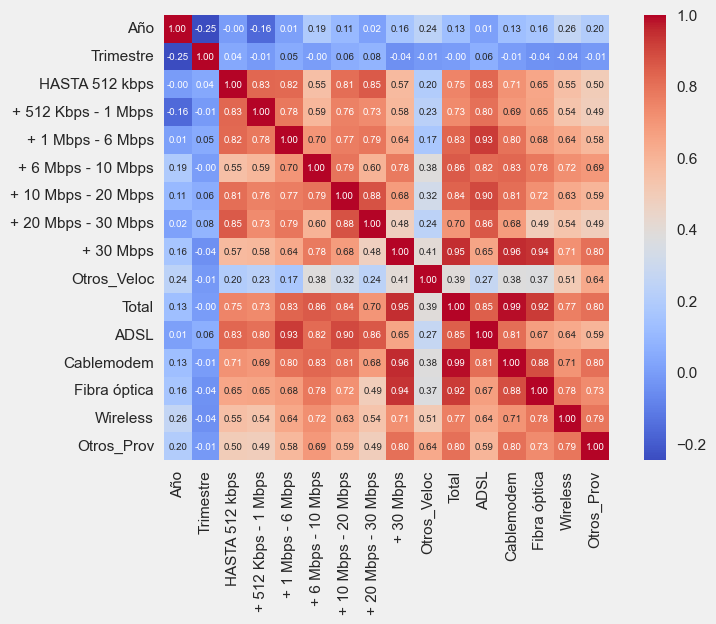

In [123]:
corr = df_total.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7},
            cmap='coolwarm')
plt.show()

La variable a analizar seria Total, debido a que esta resume la cantidad de velocidades y tecnologias usadas por los Argentinos.

- Gracias a esta se puede analizar que la mayoria de la poblacion Argentina utiliza Cablemodem como medio de conexion a la red de internet, pero no muy por detras se encuentra la Fibra óptica.

- Tambien podemos identificar que la mayoria de los Argentinos suelen contratar un internet de +30 Mbps.

Teniendo el par de conclusiones anteriores podemos empezar crear un producto que contenga internet Cablemodem o Fibra óptica con velocidades de conexion mayores a 30 Mbps.

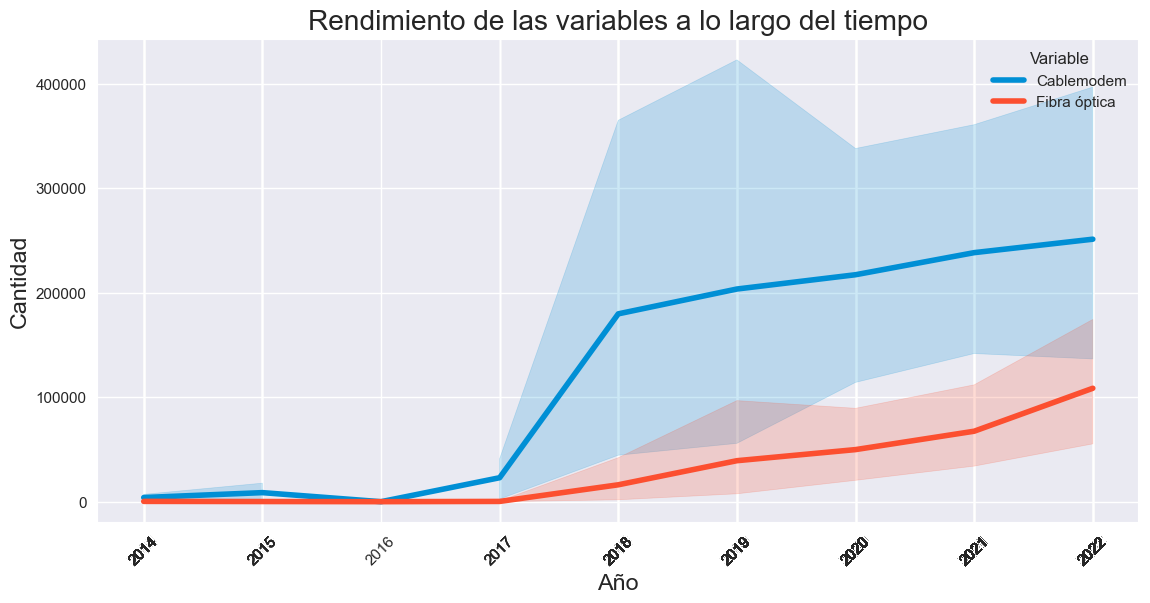

In [124]:
df_long = pd.melt(df_total, id_vars=['Año'], value_vars=['Cablemodem', 'Fibra óptica'], var_name='Variable', value_name='Cantidad')

# Create line plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Variable')
plt.title("Rendimiento de las variables a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(df_total['Año']) # Establecer intervalo entre ticks del eje X
plt.xticks(rotation=45) # Rotar los ticks del eje X para mayor legibilidad
plt.show()

# Predicciones

In [267]:
from sklearn.model_selection import train_test_split

X = df_total[['Año']]
y = df_total[['Fibra óptica', 'Cablemodem']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
from sklearn.linear_model import LinearRegression


# Entrenar el modelo de regresión lineal múltiple
reg = LinearRegression().fit(X_train, y_train)


In [282]:
X_futuro = np.array(range(2022, 2031)).reshape(-1, 1)
y_futuro = reg.predict(X_futuro)

c:\Users\mario\projects\henry_labs\henry_lab02\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


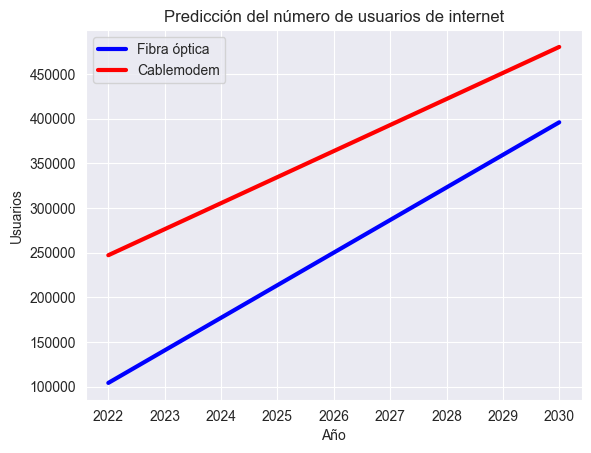

In [286]:
# Graficar las predicciones para los próximos 5 años
plt.plot(X_futuro, y_futuro[:, 0], color='blue', linewidth=3, label='Fibra óptica')
plt.plot(X_futuro, y_futuro[:, 1], color='red', linewidth=3, label='Cablemodem')

# Agregar etiquetas y título a la gráfica
plt.xlabel('Año')
plt.ylabel('Usuarios')
plt.title('Predicción del número de usuarios de internet')
plt.legend()
plt.show()

### TELEFONIA MOVIL VS INTERNET VS TELEFONIA FIJA

Data de tv 

In [165]:
url_tv = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-86109/data.ajson/?auth_key={auth_api}&limit=50&"
response_tv = requests.get(url_tv)
if response_tv.status_code == 200:
    data_tv = response_tv.json()
else:
    print("Error en la petición:", response.status_code)

In [166]:
df_internet = pd.read_csv('../data/Internet_Ingresos.csv')
df_movil = pd.read_csv('../data/Telefonia_movil.csv')
df_fija = pd.read_csv('../data/telefonia_fija.csv')
df_tv = pd.DataFrame(data_tv['result'][1:], columns=data_tv['result'][0])

In [167]:
df_internet = df_internet.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_movil = df_movil.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_tv = df_tv.applymap(lambda x: x.replace(',', '').replace('$', '').replace('.', '') if isinstance(x, str) else x)
df_fija = df_fija.applymap(lambda x: x.replace('.', '') if isinstance(x, str) else x)


In [168]:
df_fija = df_fija[['Año', 'Trimestre', 'Accesos telefonía fija (total)', 'Accesos telefonía fija (hogares)']].copy()

In [169]:
df_internet.drop(columns='Periodo', inplace=True)
df_movil.drop(columns='Periodo', inplace=True)

In [170]:
df_internet = df_internet.astype(np.int64)
df_movil = df_movil.astype(np.int64)
df_tv = df_tv.astype(np.int64)
df_fija = df_fija.astype(np.int64)

In [171]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        35 non-null     int64
 1   Trimestre                  35 non-null     int64
 2   Ingresos (miles de pesos)  35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes


In [172]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    39 non-null     int64
 1   Trimestre              39 non-null     int64
 2   Ingresos (miles de $)  39 non-null     int64
dtypes: int64(3)
memory usage: 1.0 KB


In [173]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 3   Ingresos TV satelital (miles de $)         35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [174]:
df_fija.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Año                               35 non-null     int64
 1   Trimestre                         35 non-null     int64
 2   Accesos telefonía fija (total)    35 non-null     int64
 3   Accesos telefonía fija (hogares)  35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [176]:
df_service = pd.merge(df_internet, df_movil, on=['Año', 'Trimestre']).merge(df_tv, on=['Año', 'Trimestre']).merge(df_fija, on=['Año', 'Trimestre'])

In [177]:
df_service.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
0,2022,3,67055930,174057836,5224278463,2707319089,7525944,6880892
1,2022,2,60335724,153032313,4629267344,2355948483,7633074,6960775
2,2022,1,55589997,130454676,4209387019,2126808624,7664854,6984398
3,2021,4,45467887,127389786,382733918,1803806544,7626355,6933738
4,2021,3,42999944,117751925,3639802553,180395195,7003303,6311742


In [178]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos (miles de pesos)                  35 non-null     int64
 3   Ingresos (miles de $)                      35 non-null     int64
 4   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 5   Ingresos TV satelital (miles de $)         35 non-null     int64
 6   Accesos telefonía fija (total)             35 non-null     int64
 7   Accesos telefonía fija (hogares)           35 non-null     int64
dtypes: int64(8)
memory usage: 2.3 KB


In [179]:
df_service.tail()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
30,2015,1,4876385,19337342,529208822,302183723,10086221,8358053
31,2014,4,3950441,20012332,471196739,268612401,9689752,7989623
32,2014,3,3478638,18976053,442300882,253079672,9613361,7924613
33,2014,2,3270816,17680972,405372907,234170831,9548994,7872511
34,2014,1,2984054,15938353,359948435,200122117,9562231,7897980


In [180]:
df_service_filter = df_service.query('Año >= 2020').copy()

In [181]:
df_service_filter

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Accesos telefonía fija (total),Accesos telefonía fija (hogares)
0,2022,3,67055930,174057836,5224278463,2707319089,7525944,6880892
1,2022,2,60335724,153032313,4629267344,2355948483,7633074,6960775
2,2022,1,55589997,130454676,4209387019,2126808624,7664854,6984398
3,2021,4,45467887,127389786,382733918,1803806544,7626355,6933738
4,2021,3,42999944,117751925,3639802553,180395195,7003303,6311742
5,2021,2,38239667,104782020,3367499579,1803844236,7081716,6378508
6,2021,1,36676371,93112153,3192451501,1803836096,7200461,6459673
7,2020,4,33539703,83479114,2632409862,1447962262,7364032,6621370
8,2020,3,31997445,79634755,253861546,1293320033,7432548,6712162
9,2020,2,32102476,73538944,2462000949,1254472593,7463257,6694729


In [184]:
df_service_filter = df_service_filter.rename(columns={'Ingresos (miles de pesos)': 'Ingresos_Internet (miles de pesos)',
                                                      'Ingresos (miles de $)':'Ingresos_Movil (miles de $)'})

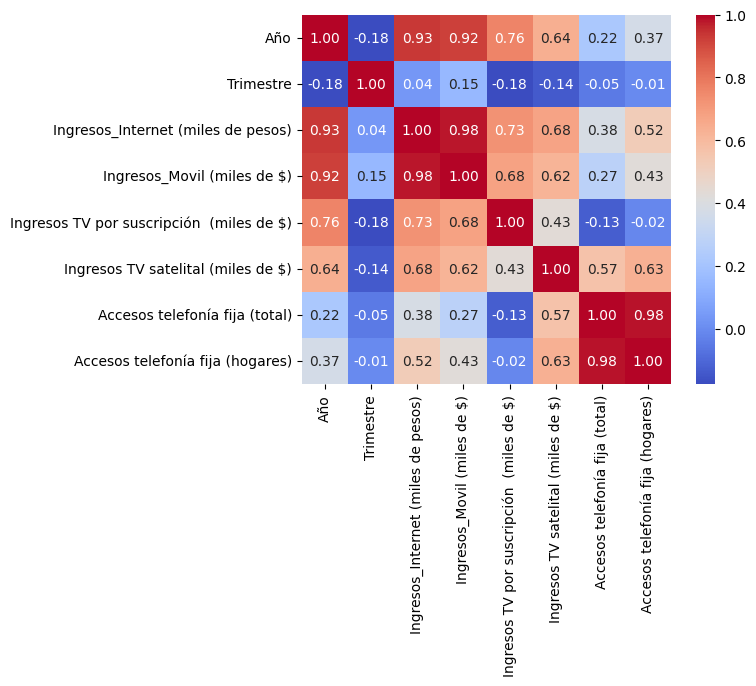

In [185]:
corr = df_service_filter.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            cmap='coolwarm')
plt.show()

Crear un servicio de plan hogar que incluya Internet, Telefonia Movil y TV por suscripcion (Netflix, Amazon Prime, Hulu, Disney+)

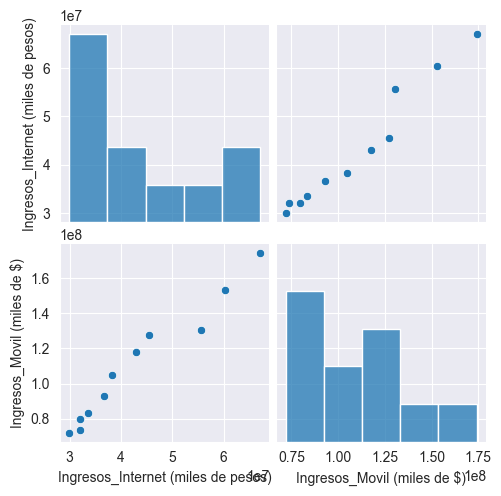

In [284]:
sns.pairplot(df_service_filter[['Ingresos_Internet (miles de pesos)', 'Ingresos_Movil (miles de $)']] )